<a href="https://colab.research.google.com/github/rohithreddy999/Feynn-lab/blob/main/Supply_chain_management_for_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("/content/supply chain management for cars.csv")

In [3]:
df.head()

,SupplierID,SupplierAddress,SupplierName,SupplierContactDetails,ProductID,CarMaker,CarModel,CarColor,CarModelYear,CarPrice,...,ShipDate,ShipMode,Shipping,PostalCode,Sales,Quantity,Discount,CreditCardType,CreditCard,CustomerFeedback
0,1,542 Dayton Center,Bubbletube,871-57-6028,8893,Dodge,Ram 2500,Goldenrod,2007,521963.45,...,2019/03/14,Standard Class,Truck,99522,744796.41,1,0.83,diners-club-carte-blanche,30408016042565,Bad
1,2,0674 Springview Circle,Tagopia,337-64-4060,9444,Toyota,Tundra,Crimson,2010,672222.04,...,2019/03/06,Standard Class,Truck,56398,794773.17,1,0.79,jcb,3549221112237767,Good
2,3,70 Autumn Leaf Center,Zoomdog,218-19-1802,253,GMC,Savana 1500,Crimson,2011,504465.72,...,2019/01/20,Second Class,Air,60674,968244.90,1,0.28,jcb,3557159608180902,Okay
3,4,649 Corben Lane,Oozz,635-15-3112,1283,Volkswagen,Cabriolet,Fuscia,1990,646077.11,...,2019/03/16,First Class,Truck,32885,942213.82,2,0.76,jcb,3529909223663921,Very Bad
4,5,94 Namekagon Point,Kare,849-23-6788,8905,Mercury,Mariner,Teal,2009,699890.24,...,2019/01/29,Second Class,Air,48232,879519.57,1,0.50,china-unionpay,5602235978541517,Bad


In [4]:
#dropping unnecessary columns
df.drop(columns=["CarModelYear","CarColor","CreditCardType",	"CustomerFeedback","SupplierID" ,"SupplierAddress" ,"SupplierName","CreditCard","CarModel","CarMaker","SupplierContactDetails","ProductID", "CustomerID","CustomerName","Gender","JobTitle","PhoneNumber","EmailAddress","City","CountryCode","CustomerAddress","OrderDate", "OrderID","ShipDate","PostalCode"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CarPrice  1000 non-null   float64
 1   Country   1000 non-null   object 
 2   State     1000 non-null   object 
 3   ShipMode  1000 non-null   object 
 4   Shipping  1000 non-null   object 
 5   Sales     1000 non-null   float64
 6   Quantity  1000 non-null   int64  
 7   Discount  1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [6]:
df.describe()

,CarPrice,Sales,Quantity,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,649092.193460,853098.713020,1.512000,0.577360
std,85427.262753,88538.571965,0.500106,0.187478
min,500412.460000,700321.490000,1.000000,0.250000
25%,572393.805000,775655.062500,1.000000,0.410000
50%,654965.000000,858117.980000,2.000000,0.580000
75%,721050.725000,932854.565000,2.000000,0.740000
max,799454.240000,999315.690000,2.000000,0.900000


In [7]:
#shape of the dataset
df.shape

(1000, 8)

In [8]:
df.head()

,CarPrice,Country,State,ShipMode,Shipping,Sales,Quantity,Discount
0,521963.45,United States,Alaska,Standard Class,Truck,744796.41,1,0.83
1,672222.04,United States,Minnesota,Standard Class,Truck,794773.17,1,0.79
2,504465.72,United States,Illinois,Second Class,Air,968244.90,1,0.28
3,646077.11,United States,Florida,First Class,Truck,942213.82,2,0.76
4,699890.24,United States,Michigan,Second Class,Air,879519.57,1,0.50


In [9]:
#checking for null values
df.isnull().sum()

CarPrice    0
Country     0
State       0
ShipMode    0
Shipping    0
Sales       0
Quantity    0
Discount    0
dtype: int64

In [10]:
#replacing categorical variables with numeric values using labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Country=le.fit_transform(df.Country)
df.State=le.fit_transform(df.State)
df.ShipMode=le.fit_transform(df.ShipMode)
df.Shipping=le.fit_transform(df.Shipping)

In [11]:
df.head()

,CarPrice,Country,State,ShipMode,Shipping,Sales,Quantity,Discount
0,521963.45,0,1,3,1,744796.41,1,0.83
1,672222.04,0,23,3,1,794773.17,1,0.79
2,504465.72,0,13,2,0,968244.90,1,0.28
3,646077.11,0,9,0,1,942213.82,2,0.76
4,699890.24,0,22,2,0,879519.57,1,0.50


In [12]:
names=["CarPrice",	"Country",	"State",	"ShipMode"	,"Shipping"	,"Sales",	"Quantity"	,"Discount"]

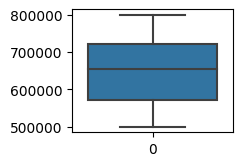

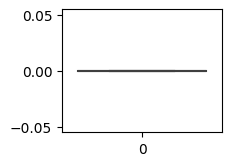

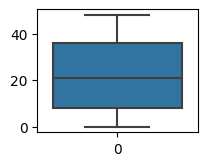

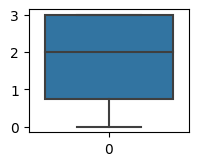

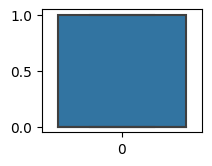

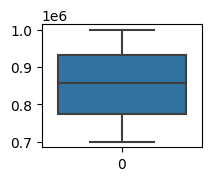

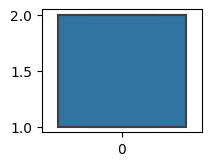

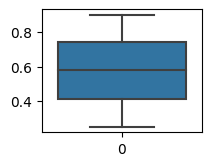

In [13]:
#outlier detection
import matplotlib.pyplot as plt
for i,j in enumerate(names):
  plt.figure(figsize=(12,15))
  plt.subplot(8,5,i+1)
  sns.boxplot(df[j])

In [14]:
#choosing the dependent and independent values accross x and y 
x=df.drop(columns="CarPrice",axis=1)
x.head()

,Country,State,ShipMode,Shipping,Sales,Quantity,Discount
0,0,1,3,1,744796.41,1,0.83
1,0,23,3,1,794773.17,1,0.79
2,0,13,2,0,968244.90,1,0.28
3,0,9,0,1,942213.82,2,0.76
4,0,22,2,0,879519.57,1,0.50


In [15]:
y=df[["CarPrice"]]
y.head()

,CarPrice
0,521963.45
1,672222.04
2,504465.72
3,646077.11
4,699890.24


In [16]:
#normalizing the values and bringing them to the scale of o and 1
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns = x.columns)
y_scaled= pd.DataFrame(scale.fit_transform(y),columns = y.columns)

In [17]:
x_scaled.head()

,Country,State,ShipMode,Shipping,Sales,Quantity,Discount
0,0.0,0.020833,1.000000,1.0,0.148748,0.0,0.892308
1,0.0,0.479167,1.000000,1.0,0.315898,0.0,0.830769
2,0.0,0.270833,0.666667,0.0,0.896082,0.0,0.046154
3,0.0,0.187500,0.000000,1.0,0.809020,1.0,0.784615
4,0.0,0.458333,0.666667,0.0,0.599336,0.0,0.384615


In [18]:
y_scaled.head()

,CarPrice
0,0.072067
1,0.574534
2,0.013554
3,0.487105
4,0.667057


In [19]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=0)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 7), (200, 7), (800, 1), (200, 1))

In [21]:
#fitting linear regression model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [22]:
#evaluation metrics
#MEAN SQUARD ERROR
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
#ROOT MEAN SQUARED ERROR
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.0880007761178696
Root Mean Squared Error: 0.29664924762734457
Mean Absolute Error: 0.25903561918606316


In [23]:
# ANN REGRESSION MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
reg_model=Sequential()
#Adding the input layer
reg_model.add(Dense(7,activation="relu"))
#Adding four hidden layers
reg_model.add(Dense(128,activation="relu"))
reg_model.add(Dense(64,activation="relu"))
reg_model.add(Dense(32,activation="relu"))
reg_model.add(Dense(16,activation="relu"))
#Adding the output layer
reg_model.add(Dense(1,activation="linear"))

In [25]:
#compiling the model
reg_model.compile(optimizer="adam",loss="mse",metrics=['mse','mae'])

In [26]:
#fitting the ann regression model to the training data
reg_model.fit(x_train,y_train,epochs=40,batch_size=2,validation_data=(x_test,y_test))

Epoch 1/40
400/400 [==============================] - 3s 3ms/step - loss: 0.1003 - mse: 0.1003 - mae: 0.2672 - val_loss: 0.0881 - val_mse: 0.0881 - val_mae: 0.2592
Epoch 2/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0838 - mse: 0.0838 - mae: 0.2467 - val_loss: 0.0881 - val_mse: 0.0881 - val_mae: 0.2575
Epoch 3/40
400/400 [==============================] - 1s 3ms/step - loss: 0.0826 - mse: 0.0826 - mae: 0.2457 - val_loss: 0.0910 - val_mse: 0.0910 - val_mae: 0.2584
Epoch 4/40
400/400 [==============================] - 3s 8ms/step - loss: 0.0817 - mse: 0.0817 - mae: 0.2450 - val_loss: 0.0911 - val_mse: 0.0911 - val_mae: 0.2647
Epoch 5/40
400/400 [==============================] - 2s 6ms/step - loss: 0.0819 - mse: 0.0819 - mae: 0.2457 - val_loss: 0.0892 - val_mse: 0.0892 - val_mae: 0.2617
Epoch 6/40
400/400 [==============================] - 2s 4ms/step - loss: 0.0803 - mse: 0.0803 - mae: 0.2451 - val_loss: 0.0907 - val_mse: 0.0907 - val_mae: 0.2580
Epoch 7/40
400/4

In [27]:
#evaluation
y_pred_1=reg_model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [28]:
# Evaluate the model on test data using MSE
from tensorflow import keras
#MEAN SQUARD ERROR
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse_1)
#ROOT MEAN SQUARED ERROR
import numpy as np
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)
print('Root Mean Squared Error:', rmse_1)
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae_1 = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae_1)


Mean Squared Error: 0.0880007761178696
Root Mean Squared Error: 0.29664924762734457
Mean Absolute Error: 0.25903561918606316


In [29]:
df.head()

,CarPrice,Country,State,ShipMode,Shipping,Sales,Quantity,Discount
0,521963.45,0,1,3,1,744796.41,1,0.83
1,672222.04,0,23,3,1,794773.17,1,0.79
2,504465.72,0,13,2,0,968244.90,1,0.28
3,646077.11,0,9,0,1,942213.82,2,0.76
4,699890.24,0,22,2,0,879519.57,1,0.50


In [30]:
#TESTING
Testing=reg_model.predict([[4,2,5,3,879865.236894,2,0.566]])
Testing

1/1 [==============================] - 0s 105ms/step


array([[164535.36]], dtype=float32)

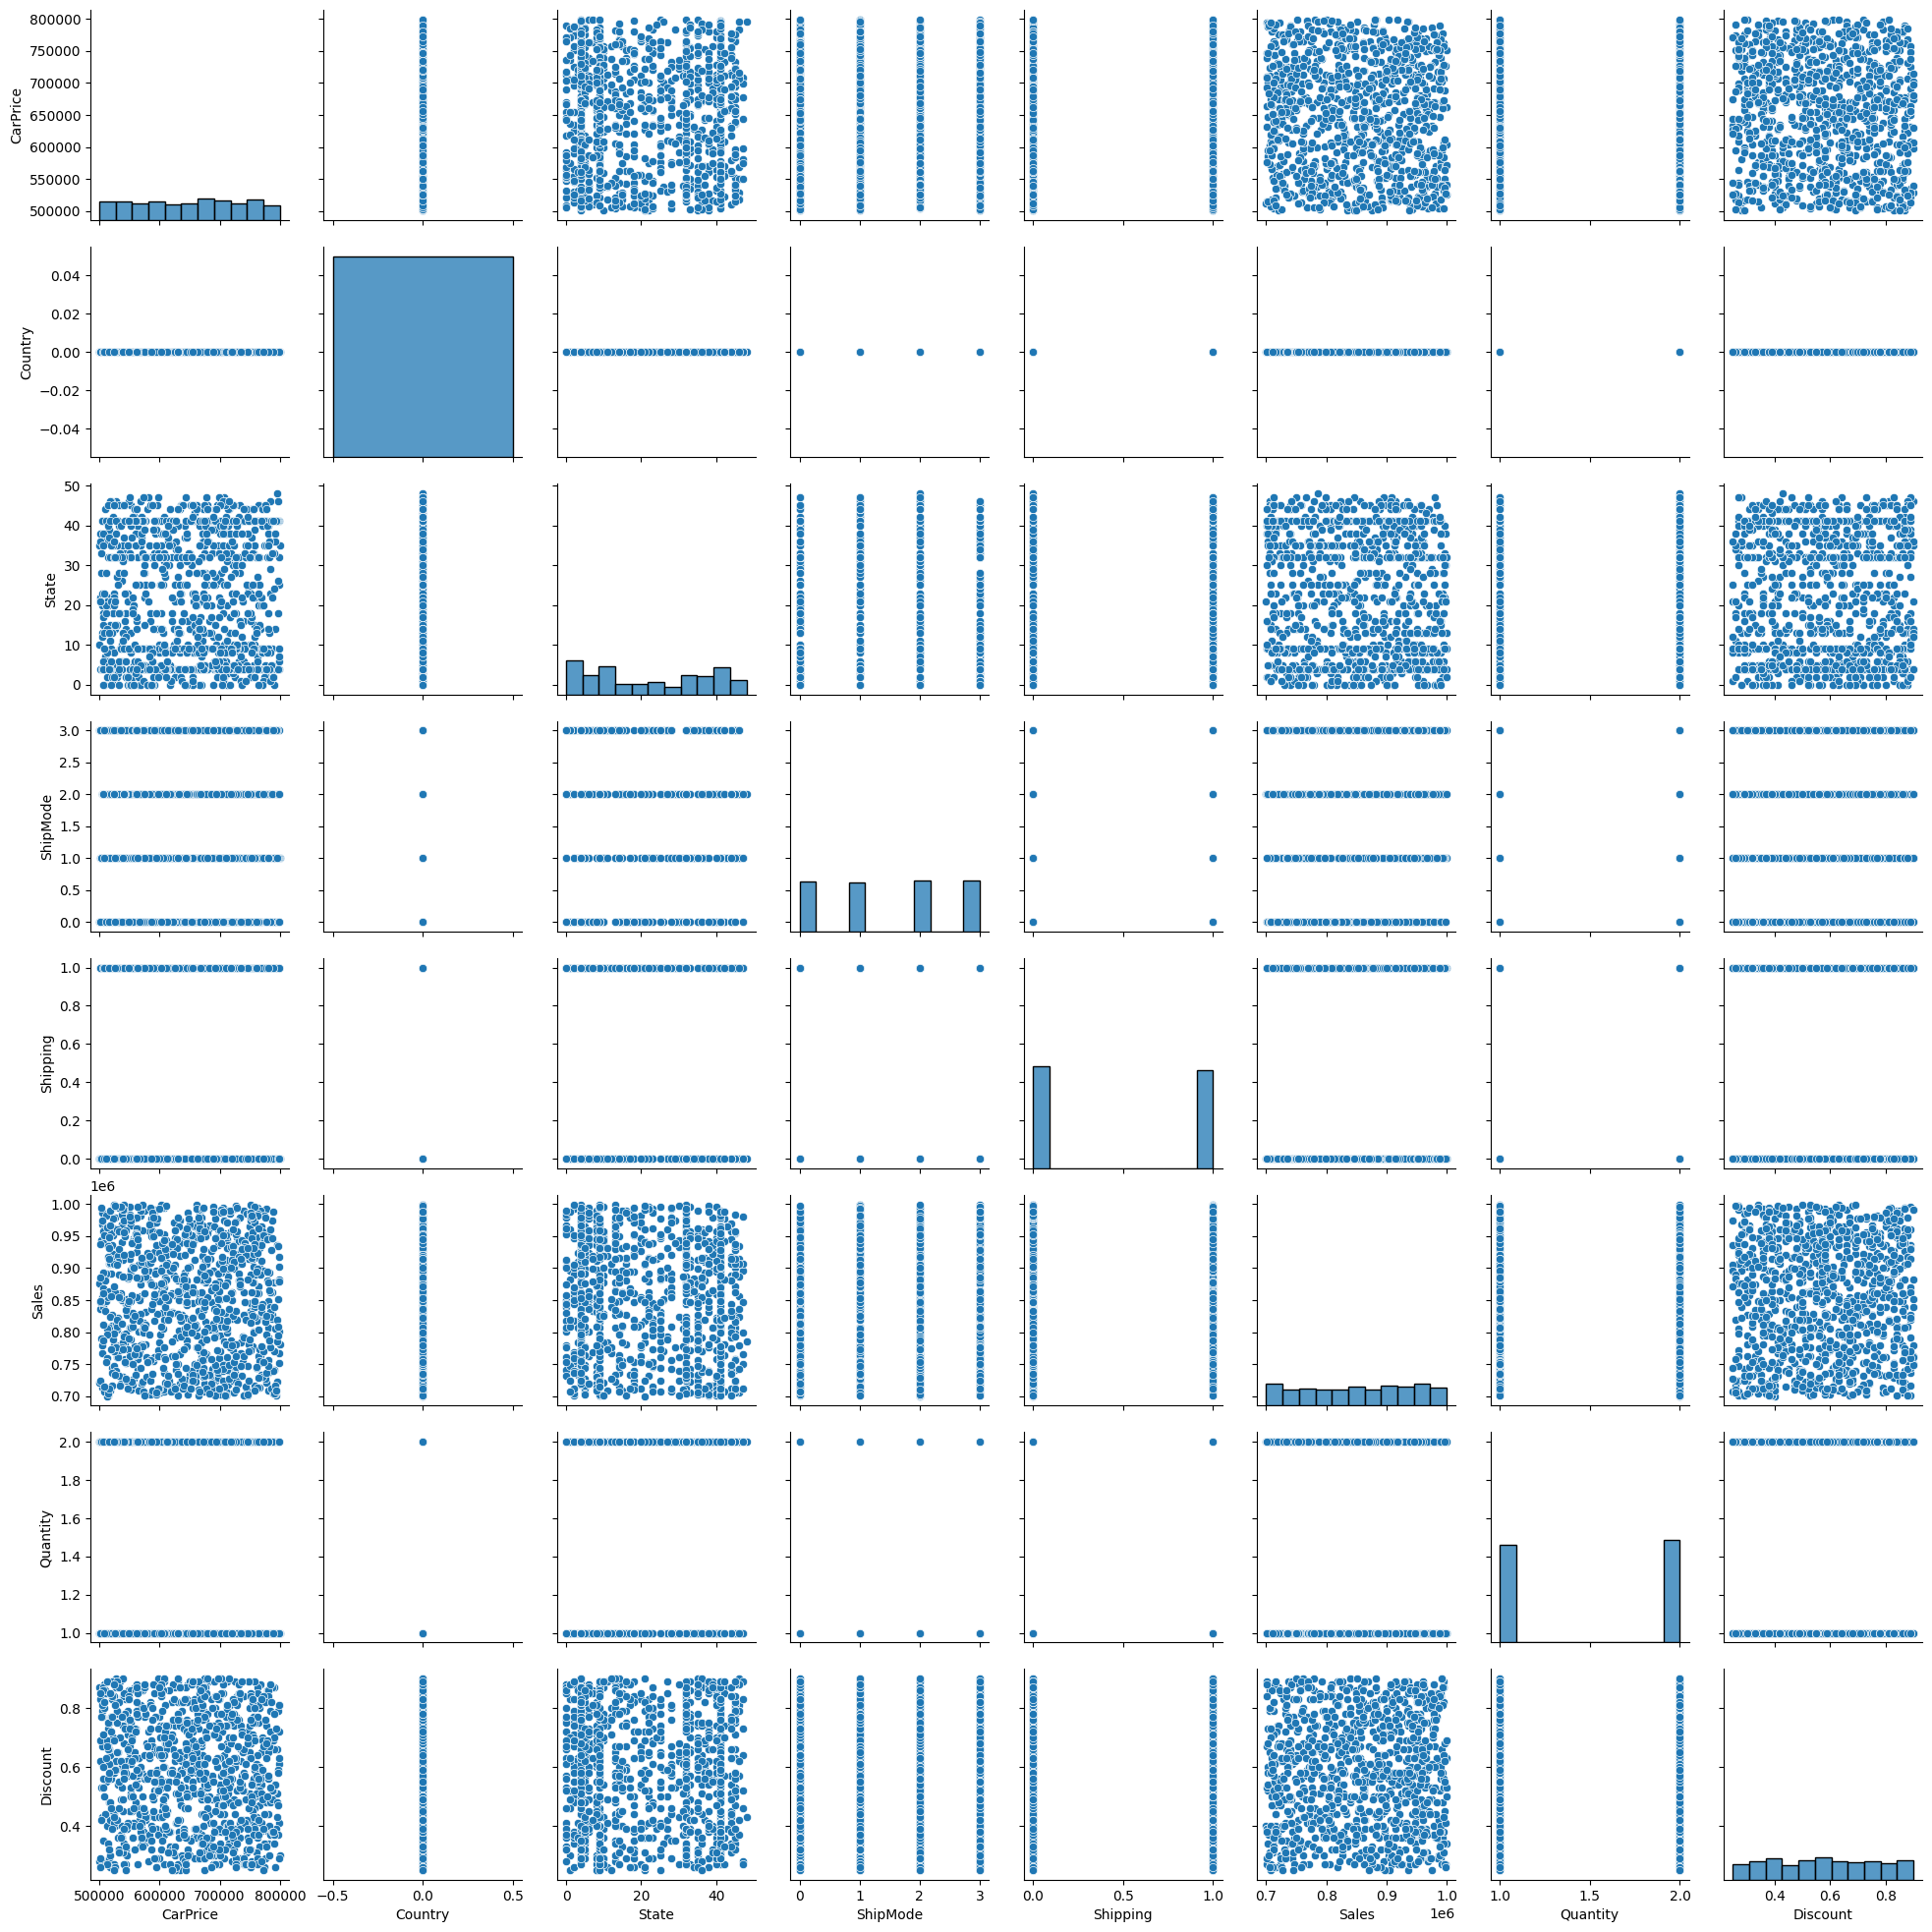

In [31]:
sns.pairplot(df)

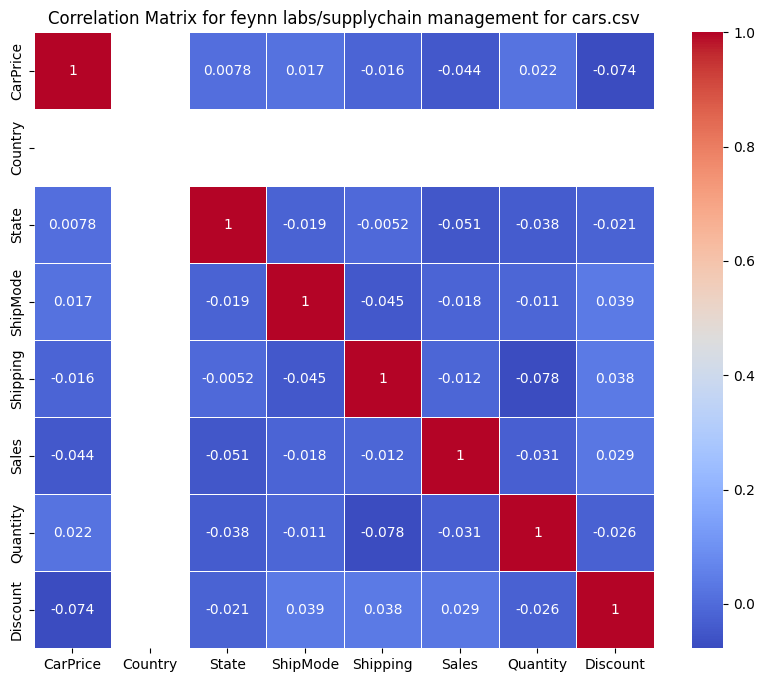

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for feynn labs/supplychain management for cars.csv')
plt.show()


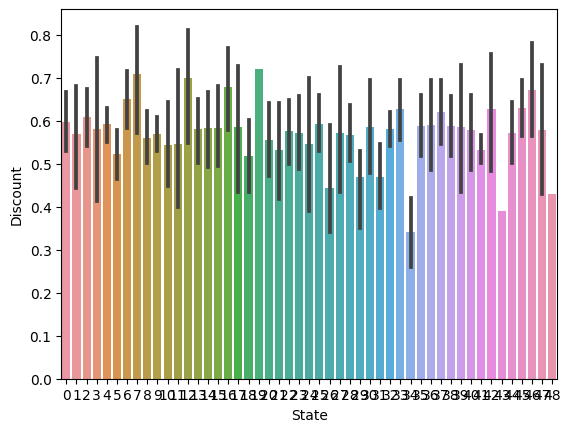

In [33]:
sns.barplot(data=df,x=df['State'],y=df['Discount'])
plt.show()

In [34]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

<ipython-input-34-40f095ccc9ac>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [35]:
y_pred_2=rf.predict(x_test)
#MEAN SQUARD ERROR
from sklearn.metrics import mean_squared_error
mse_2 = mean_squared_error(y_test, y_pred_2)
print('Mean Squared Error:', mse_2)
#ROOT MEAN SQUARED ERROR
import numpy as np
from sklearn.metrics import mean_squared_error
mse_2= mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)
print('Root Mean Squared Error:', rmse_2)
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae_2 = mean_absolute_error(y_test, y_pred_2)
print('Mean Absolute Error:', mae_2)

Mean Squared Error: 0.09525642633847106
Root Mean Squared Error: 0.3086363982722567
Mean Absolute Error: 0.26729240837183355


In [36]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_3 = dt.predict(x_test)

In [37]:
#MEAN SQUARD ERROR
from sklearn.metrics import mean_squared_error
mse_3 = mean_squared_error(y_test, y_pred_3)
print('Mean Squared Error:', mse_3)
#ROOT MEAN SQUARED ERROR
import numpy as np
from sklearn.metrics import mean_squared_error
mse_3= mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)
print('Root Mean Squared Error:', rmse_3)
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae_3 = mean_absolute_error(y_test, y_pred_3)
print('Mean Absolute Error:', mae_3)

Mean Squared Error: 0.17462357591803518
Root Mean Squared Error: 0.4178798582344394
Mean Absolute Error: 0.3486736858307893


In [38]:
#xg boost regressor
import xgboost as xgb
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train, y_train)
y_pred_4= xgbr.predict(x_test)

In [39]:
#MEAN SQUARD ERROR
from sklearn.metrics import mean_squared_error
mse_4 = mean_squared_error(y_test, y_pred_4)
print('Mean Squared Error:', mse_4)
#ROOT MEAN SQUARED ERROR
import numpy as np
from sklearn.metrics import mean_squared_error
mse_4= mean_squared_error(y_test, y_pred_4)
rmse_4 = np.sqrt(mse_4)
print('Root Mean Squared Error:', rmse_4)
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae_4= mean_absolute_error(y_test, y_pred_4)
print('Mean Absolute Error:', mae_4)

Mean Squared Error: 0.11000080223198404
Root Mean Squared Error: 0.33166368844355576
Mean Absolute Error: 0.2848840068834364


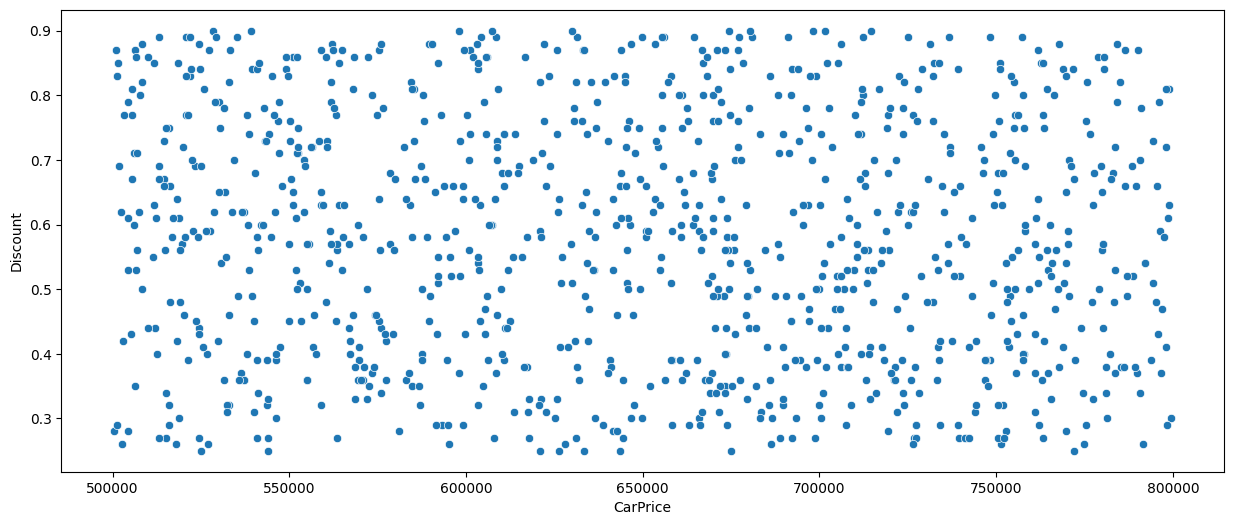

In [40]:
#Some Basic Visualizations on Real World or Augmented Data

plt.figure(figsize=(15,6))
sns.scatterplot(x=df['CarPrice'],y=df['Discount'])
plt.show()

<ipython-input-41-89e9e6d079f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CarPrice'])


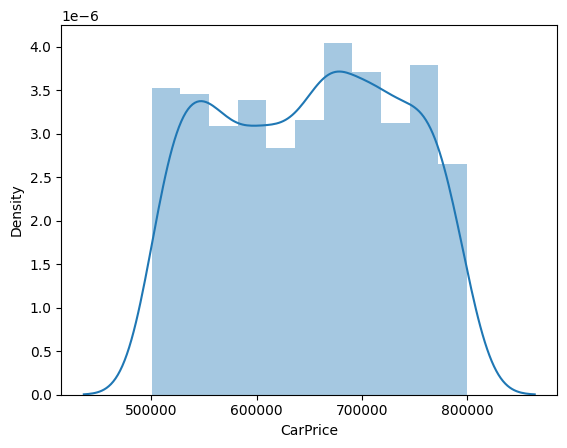

In [41]:
sns.distplot(df['CarPrice'])
plt.show()

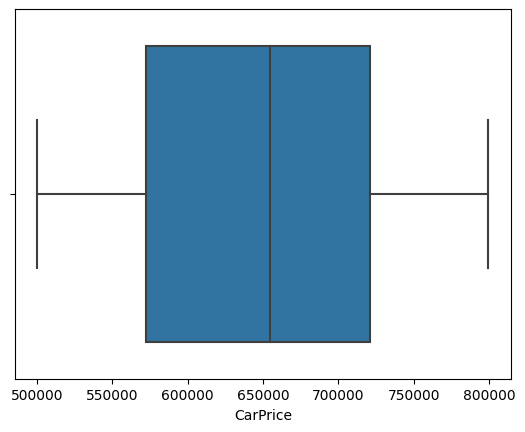

In [42]:
sns.boxplot(data=df,x=df['CarPrice'])
plt.show()